In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from matplotlib.colors import LinearSegmentedColormap
import xarray as xr
import cmocean.cm as cmo 
import gsw
from mpl_toolkits.axes_grid1 import make_axes_locatable
#from Useful import *
from matplotlib.collections import PolyCollection

from scipy.interpolate import griddata
from scipy.spatial import KDTree
from matplotlib.patches import Patch
import matplotlib as mpl

import imageio
import os
#from matplotlib.colors import LinearSegmentedColormap

#sys.path.append(os.path.abspath(os.path.join('/Users/georgiamcquade/Documents/GitHub/UFEMISM2.0/tools/python')))
#from Useful import *

from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [2]:
#path ='../../../automated_testing/integrated_tests/idealised/Thule/Thule_LAD/results_5km_iceocean1r/'
#path ='../../../automated_testing/integrated_tests/idealised/Thule/Thule_LAD/results_5km_iceocean1r_new/'
#path ='../../../automated_testing/integrated_tests/idealised/Thule/Thule_QUAD/results_5km_iceocean1r_50/'
path = '../../../automated_testing/integrated_tests/idealised/Thule/Results_test_calLAD/'
Lad = xr.open_dataset(path + 'main_output_ANT_00001.nc')
#ds_trans = xr.open_dataset(path + 'transect_CapronaA.nc')
#ds_trans = xr.open_dataset(path + 'transect_HalbraneA.nc')

In [3]:
# Initialize lists for all variables
BMB_list = []
Hi_list = []
Hs_list = []
Hib_list = []
Hb_list = []
Va_list = []
V_list = []
Tria_list = []
Tri_list = []
triang_list = []
distances_list = []
mask_ocean_list = []
mask_cf_fl_list = []
mask_gr_list = []
time_stamps_list = []  # Number of time stamps
time_values_list = []  # Actual time values if they exist

# Load all 11 datasets
for i in range(1, 12):
    # Open the dataset
    Quad = xr.open_dataset(path + f'main_output_ANT_{i:05d}.nc')
    
    # Extract variables
    BMB = Quad['BMB']
    Hi = Quad['Hi']
    Hs = Quad['Hi']  # Note: same as Hi?
    Hib = Quad['Hib']
    Hb = Quad['Hb']
    Va = Quad['V']
    V = Va.T
    Tria = Quad['Tri'] - 1  
    Tri = Tria.T
    triang = tri.Triangulation(V[:, 0], V[:, 1], Tri)
    
    
    # Calculate distances and masks
    #distances = np.sqrt(V[:, 0]**2 + V[:, 1]**2)
    #mask_ocean = distances <= radius
    mask_cf_fl = Quad['mask_cf_fl']
    mask_gr = Quad['mask_grounded_ice']
    
    # Get time information
    num_time_stamps = Hi.shape[0] if len(Hi.shape) > 1 else 1
    
    # Try to get actual time values if they exist in the dataset
    if 'time' in Quad.variables:
        time_values = Quad['time'].values
    else:
        time_values = None
    
    # Store in lists
    BMB_list.append(BMB)
    Hi_list.append(Hi)
    Hs_list.append(Hs)
    Hib_list.append(Hib)
    Hb_list.append(Hb)
    Va_list.append(Va)
    V_list.append(V)
    Tria_list.append(Tria)
    Tri_list.append(Tri)
    triang_list.append(triang)
    #distances_list.append(distances)
    #mask_ocean_list.append(mask_ocean)
    mask_cf_fl_list.append(mask_cf_fl)
    time_stamps_list.append(num_time_stamps)
    time_values_list.append(time_values)
    mask_gr_list.append(mask_gr)
    
    print(f"Loaded dataset {i}/11 - Time stamps: {num_time_stamps}")

print("All 11 datasets loaded successfully!")

# Print detailed summary
print("\nDetailed time stamps summary:")
for i, (num_ts, time_vals) in enumerate(zip(time_stamps_list, time_values_list), 1):
    if time_vals is not None:
        print(f"Dataset {i}: {num_ts} time stamps, time range: {time_vals[0]:.1f} to {time_vals[-1]:.1f} years")
    else:
        print(f"Dataset {i}: {num_ts} time stamps, no time coordinate")

Loaded dataset 1/11 - Time stamps: 1
Loaded dataset 2/11 - Time stamps: 100
Loaded dataset 3/11 - Time stamps: 100
Loaded dataset 4/11 - Time stamps: 100
Loaded dataset 5/11 - Time stamps: 100
Loaded dataset 6/11 - Time stamps: 100
Loaded dataset 7/11 - Time stamps: 100
Loaded dataset 8/11 - Time stamps: 100
Loaded dataset 9/11 - Time stamps: 100
Loaded dataset 10/11 - Time stamps: 100
Loaded dataset 11/11 - Time stamps: 100
All 11 datasets loaded successfully!

Detailed time stamps summary:
Dataset 1: 1 time stamps, time range: 0.0 to 0.0 years
Dataset 2: 100 time stamps, time range: 0.1 to 10.0 years
Dataset 3: 100 time stamps, time range: 10.1 to 20.0 years
Dataset 4: 100 time stamps, time range: 20.1 to 30.0 years
Dataset 5: 100 time stamps, time range: 30.1 to 40.0 years
Dataset 6: 100 time stamps, time range: 40.1 to 50.0 years
Dataset 7: 100 time stamps, time range: 50.1 to 60.0 years
Dataset 8: 100 time stamps, time range: 60.1 to 70.0 years
Dataset 9: 100 time stamps, time ran

In [ ]:
# Alternative approach that automatically handles any number of meshes

u = 0
tfs = 20 
afs = 18 
tifs = 15 
cbfs = 18
ctfs = 15


radius = 750000

n = 800000
m = n + 100000

colorbar_kwargs = {
    'aspect': 20,
    'pad': 0.01,
    'shrink': 0.8, 
}

timetotal = sum(time_stamps_list) 
#timetotal = 150
current_mesh = 0
current_time_in_mesh = 0
frame_count = 

temp_files = []
images = []
year = np.arange(0, timetotal,0.1)

while frame_count < timetotal:
    fig, ax = plt.subplots(1, 1, figsize=(8, 8)) 
    print(f"Processing frame {frame_count+1}/{timetotal} (mesh {current_mesh}, time {current_time_in_mesh})")
    
    # Check if we have valid data for current mesh and time
    if (current_mesh < len(Hi_list) and 
        current_time_in_mesh < len(Hi_list[current_mesh])):
        
        # Plot ice thickness
        c0 = ax.tripcolor(triang_list[current_mesh], 
                         Hi_list[current_mesh][current_time_in_mesh], 
                         cmap=cmo.balance, vmin=0, vmax=700)
        
        # Plot mask if available
        if (current_mesh < len(mask_gr_list) and 
            current_time_in_mesh < len(mask_gr_list[current_mesh])):
            ax.tricontourf(triang_list[current_mesh], 
                          mask_gr_list[current_mesh][current_time_in_mesh].astype(float), 
                          levels=[0.5, 1.5], colors='red', hatches=['////'], alpha=0.7)
        
        # Get timestamp
        tim = Hi_list[current_mesh][current_time_in_mesh].time.values
        
        # Add colorbar and labels
        cbar = fig.colorbar(c0, ax=ax, **colorbar_kwargs)
        cbar.set_label("Ice Thickness [m]", fontsize=ctfs) 
        ax.set_title(f'Ice thickness [m] at t = {tim:.1f} years', fontsize=tfs)

        ax.set_xlabel('X [km]', fontsize=afs)
        ax.set_ylabel('Y [km]', fontsize=afs)
        ax.set_xticks(np.arange(-n, n + 1, 200000))
        ax.set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200), fontsize=tifs)
        ax.set_yticks(np.arange(-n, n + 1, 200000))
        ax.set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200), fontsize=tifs)
        
        ax.set_aspect('equal')

        filename = f'TEMP{year[frame_count]:.1f}.png'
        plt.savefig(filename, bbox_inches='tight', dpi=300) 
        temp_files.append(filename) 
        plt.close()
        images.append(imageio.imread(filename))
        
        frame_count += 1
        
        # Move to next timestamp
        current_time_in_mesh += 1
        
        # If we've used all timestamps in current mesh, move to next mesh
        if current_time_in_mesh >= len(Hi_list[current_mesh]):
            current_mesh += 1
            current_time_in_mesh = 0
    else:
        # No more data available
        print(f"No more data after frame {frame_count}")
        break

print(f"Processed {frame_count} frames across {current_mesh} meshes")

Processing frame 1/1001 (mesh 0, time 0)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 2/1001 (mesh 1, time 0)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 3/1001 (mesh 1, time 1)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 4/1001 (mesh 1, time 2)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 5/1001 (mesh 1, time 3)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 6/1001 (mesh 1, time 4)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 7/1001 (mesh 1, time 5)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 8/1001 (mesh 1, time 6)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 9/1001 (mesh 1, time 7)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 10/1001 (mesh 1, time 8)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 11/1001 (mesh 1, time 9)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 12/1001 (mesh 1, time 10)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 13/1001 (mesh 1, time 11)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 14/1001 (mesh 1, time 12)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 15/1001 (mesh 1, time 13)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 16/1001 (mesh 1, time 14)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 17/1001 (mesh 1, time 15)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 18/1001 (mesh 1, time 16)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 19/1001 (mesh 1, time 17)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 20/1001 (mesh 1, time 18)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 21/1001 (mesh 1, time 19)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 22/1001 (mesh 1, time 20)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 23/1001 (mesh 1, time 21)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 24/1001 (mesh 1, time 22)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 25/1001 (mesh 1, time 23)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 26/1001 (mesh 1, time 24)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 27/1001 (mesh 1, time 25)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 28/1001 (mesh 1, time 26)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 29/1001 (mesh 1, time 27)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 30/1001 (mesh 1, time 28)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 31/1001 (mesh 1, time 29)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 32/1001 (mesh 1, time 30)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 33/1001 (mesh 1, time 31)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 34/1001 (mesh 1, time 32)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 35/1001 (mesh 1, time 33)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 36/1001 (mesh 1, time 34)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 37/1001 (mesh 1, time 35)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 38/1001 (mesh 1, time 36)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 39/1001 (mesh 1, time 37)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 40/1001 (mesh 1, time 38)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 41/1001 (mesh 1, time 39)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 42/1001 (mesh 1, time 40)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 43/1001 (mesh 1, time 41)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 44/1001 (mesh 1, time 42)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 45/1001 (mesh 1, time 43)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 46/1001 (mesh 1, time 44)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 47/1001 (mesh 1, time 45)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 48/1001 (mesh 1, time 46)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 49/1001 (mesh 1, time 47)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 50/1001 (mesh 1, time 48)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 51/1001 (mesh 1, time 49)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 52/1001 (mesh 1, time 50)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 53/1001 (mesh 1, time 51)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 54/1001 (mesh 1, time 52)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 55/1001 (mesh 1, time 53)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 56/1001 (mesh 1, time 54)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 57/1001 (mesh 1, time 55)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 58/1001 (mesh 1, time 56)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 59/1001 (mesh 1, time 57)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 60/1001 (mesh 1, time 58)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 61/1001 (mesh 1, time 59)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 62/1001 (mesh 1, time 60)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 63/1001 (mesh 1, time 61)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 64/1001 (mesh 1, time 62)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 65/1001 (mesh 1, time 63)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 66/1001 (mesh 1, time 64)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 67/1001 (mesh 1, time 65)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 68/1001 (mesh 1, time 66)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 69/1001 (mesh 1, time 67)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 70/1001 (mesh 1, time 68)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 71/1001 (mesh 1, time 69)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 72/1001 (mesh 1, time 70)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 73/1001 (mesh 1, time 71)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 74/1001 (mesh 1, time 72)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 75/1001 (mesh 1, time 73)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 76/1001 (mesh 1, time 74)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 77/1001 (mesh 1, time 75)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 78/1001 (mesh 1, time 76)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 79/1001 (mesh 1, time 77)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 80/1001 (mesh 1, time 78)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 81/1001 (mesh 1, time 79)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 82/1001 (mesh 1, time 80)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 83/1001 (mesh 1, time 81)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 84/1001 (mesh 1, time 82)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 85/1001 (mesh 1, time 83)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 86/1001 (mesh 1, time 84)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 87/1001 (mesh 1, time 85)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 88/1001 (mesh 1, time 86)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 89/1001 (mesh 1, time 87)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 90/1001 (mesh 1, time 88)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 91/1001 (mesh 1, time 89)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 92/1001 (mesh 1, time 90)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 93/1001 (mesh 1, time 91)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 94/1001 (mesh 1, time 92)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 95/1001 (mesh 1, time 93)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 96/1001 (mesh 1, time 94)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 97/1001 (mesh 1, time 95)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 98/1001 (mesh 1, time 96)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 99/1001 (mesh 1, time 97)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 100/1001 (mesh 1, time 98)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 101/1001 (mesh 1, time 99)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 102/1001 (mesh 2, time 0)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 103/1001 (mesh 2, time 1)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 104/1001 (mesh 2, time 2)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 105/1001 (mesh 2, time 3)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 106/1001 (mesh 2, time 4)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 107/1001 (mesh 2, time 5)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 108/1001 (mesh 2, time 6)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 109/1001 (mesh 2, time 7)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 110/1001 (mesh 2, time 8)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 111/1001 (mesh 2, time 9)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 112/1001 (mesh 2, time 10)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 113/1001 (mesh 2, time 11)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 114/1001 (mesh 2, time 12)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 115/1001 (mesh 2, time 13)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 116/1001 (mesh 2, time 14)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 117/1001 (mesh 2, time 15)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 118/1001 (mesh 2, time 16)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 119/1001 (mesh 2, time 17)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 120/1001 (mesh 2, time 18)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 121/1001 (mesh 2, time 19)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 122/1001 (mesh 2, time 20)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 123/1001 (mesh 2, time 21)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 124/1001 (mesh 2, time 22)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 125/1001 (mesh 2, time 23)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 126/1001 (mesh 2, time 24)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 127/1001 (mesh 2, time 25)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 128/1001 (mesh 2, time 26)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 129/1001 (mesh 2, time 27)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 130/1001 (mesh 2, time 28)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 131/1001 (mesh 2, time 29)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 132/1001 (mesh 2, time 30)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 133/1001 (mesh 2, time 31)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 134/1001 (mesh 2, time 32)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 135/1001 (mesh 2, time 33)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 136/1001 (mesh 2, time 34)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 137/1001 (mesh 2, time 35)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 138/1001 (mesh 2, time 36)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 139/1001 (mesh 2, time 37)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 140/1001 (mesh 2, time 38)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 141/1001 (mesh 2, time 39)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 142/1001 (mesh 2, time 40)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 143/1001 (mesh 2, time 41)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 144/1001 (mesh 2, time 42)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 145/1001 (mesh 2, time 43)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 146/1001 (mesh 2, time 44)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 147/1001 (mesh 2, time 45)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 148/1001 (mesh 2, time 46)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 149/1001 (mesh 2, time 47)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 150/1001 (mesh 2, time 48)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 151/1001 (mesh 2, time 49)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 152/1001 (mesh 2, time 50)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 153/1001 (mesh 2, time 51)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 154/1001 (mesh 2, time 52)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 155/1001 (mesh 2, time 53)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 156/1001 (mesh 2, time 54)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 157/1001 (mesh 2, time 55)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 158/1001 (mesh 2, time 56)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 159/1001 (mesh 2, time 57)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 160/1001 (mesh 2, time 58)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 161/1001 (mesh 2, time 59)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 162/1001 (mesh 2, time 60)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 163/1001 (mesh 2, time 61)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 164/1001 (mesh 2, time 62)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 165/1001 (mesh 2, time 63)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 166/1001 (mesh 2, time 64)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 167/1001 (mesh 2, time 65)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 168/1001 (mesh 2, time 66)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 169/1001 (mesh 2, time 67)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 170/1001 (mesh 2, time 68)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 171/1001 (mesh 2, time 69)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 172/1001 (mesh 2, time 70)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 173/1001 (mesh 2, time 71)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 174/1001 (mesh 2, time 72)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 175/1001 (mesh 2, time 73)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 176/1001 (mesh 2, time 74)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 177/1001 (mesh 2, time 75)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 178/1001 (mesh 2, time 76)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 179/1001 (mesh 2, time 77)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 180/1001 (mesh 2, time 78)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 181/1001 (mesh 2, time 79)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 182/1001 (mesh 2, time 80)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 183/1001 (mesh 2, time 81)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 184/1001 (mesh 2, time 82)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 185/1001 (mesh 2, time 83)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 186/1001 (mesh 2, time 84)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 187/1001 (mesh 2, time 85)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 188/1001 (mesh 2, time 86)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 189/1001 (mesh 2, time 87)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 190/1001 (mesh 2, time 88)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 191/1001 (mesh 2, time 89)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 192/1001 (mesh 2, time 90)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 193/1001 (mesh 2, time 91)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 194/1001 (mesh 2, time 92)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 195/1001 (mesh 2, time 93)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 196/1001 (mesh 2, time 94)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 197/1001 (mesh 2, time 95)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 198/1001 (mesh 2, time 96)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 199/1001 (mesh 2, time 97)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 200/1001 (mesh 2, time 98)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 201/1001 (mesh 2, time 99)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 202/1001 (mesh 3, time 0)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 203/1001 (mesh 3, time 1)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 204/1001 (mesh 3, time 2)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 205/1001 (mesh 3, time 3)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 206/1001 (mesh 3, time 4)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 207/1001 (mesh 3, time 5)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 208/1001 (mesh 3, time 6)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 209/1001 (mesh 3, time 7)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 210/1001 (mesh 3, time 8)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 211/1001 (mesh 3, time 9)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 212/1001 (mesh 3, time 10)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 213/1001 (mesh 3, time 11)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 214/1001 (mesh 3, time 12)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 215/1001 (mesh 3, time 13)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 216/1001 (mesh 3, time 14)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 217/1001 (mesh 3, time 15)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 218/1001 (mesh 3, time 16)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 219/1001 (mesh 3, time 17)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 220/1001 (mesh 3, time 18)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 221/1001 (mesh 3, time 19)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 222/1001 (mesh 3, time 20)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 223/1001 (mesh 3, time 21)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 224/1001 (mesh 3, time 22)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 225/1001 (mesh 3, time 23)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 226/1001 (mesh 3, time 24)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 227/1001 (mesh 3, time 25)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 228/1001 (mesh 3, time 26)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 229/1001 (mesh 3, time 27)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 230/1001 (mesh 3, time 28)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 231/1001 (mesh 3, time 29)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 232/1001 (mesh 3, time 30)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 233/1001 (mesh 3, time 31)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 234/1001 (mesh 3, time 32)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 235/1001 (mesh 3, time 33)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 236/1001 (mesh 3, time 34)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 237/1001 (mesh 3, time 35)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 238/1001 (mesh 3, time 36)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 239/1001 (mesh 3, time 37)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 240/1001 (mesh 3, time 38)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 241/1001 (mesh 3, time 39)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 242/1001 (mesh 3, time 40)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 243/1001 (mesh 3, time 41)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 244/1001 (mesh 3, time 42)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 245/1001 (mesh 3, time 43)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 246/1001 (mesh 3, time 44)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 247/1001 (mesh 3, time 45)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 248/1001 (mesh 3, time 46)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 249/1001 (mesh 3, time 47)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 250/1001 (mesh 3, time 48)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 251/1001 (mesh 3, time 49)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 252/1001 (mesh 3, time 50)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 253/1001 (mesh 3, time 51)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 254/1001 (mesh 3, time 52)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 255/1001 (mesh 3, time 53)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 256/1001 (mesh 3, time 54)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 257/1001 (mesh 3, time 55)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 258/1001 (mesh 3, time 56)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 259/1001 (mesh 3, time 57)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 260/1001 (mesh 3, time 58)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 261/1001 (mesh 3, time 59)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 262/1001 (mesh 3, time 60)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 263/1001 (mesh 3, time 61)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 264/1001 (mesh 3, time 62)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 265/1001 (mesh 3, time 63)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 266/1001 (mesh 3, time 64)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 267/1001 (mesh 3, time 65)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 268/1001 (mesh 3, time 66)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 269/1001 (mesh 3, time 67)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 270/1001 (mesh 3, time 68)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 271/1001 (mesh 3, time 69)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 272/1001 (mesh 3, time 70)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 273/1001 (mesh 3, time 71)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 274/1001 (mesh 3, time 72)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 275/1001 (mesh 3, time 73)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 276/1001 (mesh 3, time 74)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 277/1001 (mesh 3, time 75)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 278/1001 (mesh 3, time 76)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 279/1001 (mesh 3, time 77)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 280/1001 (mesh 3, time 78)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 281/1001 (mesh 3, time 79)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 282/1001 (mesh 3, time 80)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 283/1001 (mesh 3, time 81)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 284/1001 (mesh 3, time 82)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 285/1001 (mesh 3, time 83)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 286/1001 (mesh 3, time 84)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 287/1001 (mesh 3, time 85)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 288/1001 (mesh 3, time 86)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 289/1001 (mesh 3, time 87)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 290/1001 (mesh 3, time 88)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 291/1001 (mesh 3, time 89)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 292/1001 (mesh 3, time 90)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 293/1001 (mesh 3, time 91)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 294/1001 (mesh 3, time 92)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 295/1001 (mesh 3, time 93)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 296/1001 (mesh 3, time 94)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 297/1001 (mesh 3, time 95)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 298/1001 (mesh 3, time 96)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 299/1001 (mesh 3, time 97)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 300/1001 (mesh 3, time 98)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 301/1001 (mesh 3, time 99)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 302/1001 (mesh 4, time 0)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 303/1001 (mesh 4, time 1)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 304/1001 (mesh 4, time 2)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 305/1001 (mesh 4, time 3)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 306/1001 (mesh 4, time 4)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 307/1001 (mesh 4, time 5)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 308/1001 (mesh 4, time 6)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 309/1001 (mesh 4, time 7)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 310/1001 (mesh 4, time 8)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 311/1001 (mesh 4, time 9)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 312/1001 (mesh 4, time 10)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 313/1001 (mesh 4, time 11)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 314/1001 (mesh 4, time 12)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 315/1001 (mesh 4, time 13)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 316/1001 (mesh 4, time 14)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 317/1001 (mesh 4, time 15)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 318/1001 (mesh 4, time 16)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 319/1001 (mesh 4, time 17)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 320/1001 (mesh 4, time 18)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 321/1001 (mesh 4, time 19)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 322/1001 (mesh 4, time 20)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 323/1001 (mesh 4, time 21)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 324/1001 (mesh 4, time 22)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 325/1001 (mesh 4, time 23)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 326/1001 (mesh 4, time 24)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 327/1001 (mesh 4, time 25)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 328/1001 (mesh 4, time 26)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 329/1001 (mesh 4, time 27)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 330/1001 (mesh 4, time 28)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 331/1001 (mesh 4, time 29)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 332/1001 (mesh 4, time 30)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 333/1001 (mesh 4, time 31)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 334/1001 (mesh 4, time 32)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 335/1001 (mesh 4, time 33)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 336/1001 (mesh 4, time 34)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 337/1001 (mesh 4, time 35)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 338/1001 (mesh 4, time 36)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 339/1001 (mesh 4, time 37)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 340/1001 (mesh 4, time 38)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 341/1001 (mesh 4, time 39)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 342/1001 (mesh 4, time 40)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 343/1001 (mesh 4, time 41)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 344/1001 (mesh 4, time 42)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 345/1001 (mesh 4, time 43)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 346/1001 (mesh 4, time 44)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 347/1001 (mesh 4, time 45)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 348/1001 (mesh 4, time 46)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 349/1001 (mesh 4, time 47)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 350/1001 (mesh 4, time 48)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 351/1001 (mesh 4, time 49)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 352/1001 (mesh 4, time 50)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 353/1001 (mesh 4, time 51)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 354/1001 (mesh 4, time 52)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 355/1001 (mesh 4, time 53)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 356/1001 (mesh 4, time 54)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 357/1001 (mesh 4, time 55)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 358/1001 (mesh 4, time 56)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 359/1001 (mesh 4, time 57)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 360/1001 (mesh 4, time 58)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 361/1001 (mesh 4, time 59)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 362/1001 (mesh 4, time 60)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 363/1001 (mesh 4, time 61)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 364/1001 (mesh 4, time 62)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 365/1001 (mesh 4, time 63)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 366/1001 (mesh 4, time 64)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 367/1001 (mesh 4, time 65)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 368/1001 (mesh 4, time 66)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 369/1001 (mesh 4, time 67)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 370/1001 (mesh 4, time 68)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 371/1001 (mesh 4, time 69)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 372/1001 (mesh 4, time 70)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 373/1001 (mesh 4, time 71)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 374/1001 (mesh 4, time 72)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 375/1001 (mesh 4, time 73)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 376/1001 (mesh 4, time 74)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 377/1001 (mesh 4, time 75)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 378/1001 (mesh 4, time 76)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 379/1001 (mesh 4, time 77)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 380/1001 (mesh 4, time 78)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 381/1001 (mesh 4, time 79)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 382/1001 (mesh 4, time 80)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 383/1001 (mesh 4, time 81)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 384/1001 (mesh 4, time 82)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 385/1001 (mesh 4, time 83)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 386/1001 (mesh 4, time 84)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 387/1001 (mesh 4, time 85)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 388/1001 (mesh 4, time 86)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 389/1001 (mesh 4, time 87)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 390/1001 (mesh 4, time 88)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 391/1001 (mesh 4, time 89)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 392/1001 (mesh 4, time 90)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 393/1001 (mesh 4, time 91)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 394/1001 (mesh 4, time 92)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 395/1001 (mesh 4, time 93)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 396/1001 (mesh 4, time 94)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 397/1001 (mesh 4, time 95)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 398/1001 (mesh 4, time 96)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 399/1001 (mesh 4, time 97)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 400/1001 (mesh 4, time 98)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 401/1001 (mesh 4, time 99)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 402/1001 (mesh 5, time 0)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 403/1001 (mesh 5, time 1)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 404/1001 (mesh 5, time 2)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 405/1001 (mesh 5, time 3)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 406/1001 (mesh 5, time 4)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 407/1001 (mesh 5, time 5)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 408/1001 (mesh 5, time 6)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 409/1001 (mesh 5, time 7)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 410/1001 (mesh 5, time 8)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 411/1001 (mesh 5, time 9)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 412/1001 (mesh 5, time 10)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 413/1001 (mesh 5, time 11)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 414/1001 (mesh 5, time 12)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 415/1001 (mesh 5, time 13)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 416/1001 (mesh 5, time 14)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 417/1001 (mesh 5, time 15)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 418/1001 (mesh 5, time 16)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 419/1001 (mesh 5, time 17)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 420/1001 (mesh 5, time 18)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 421/1001 (mesh 5, time 19)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 422/1001 (mesh 5, time 20)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 423/1001 (mesh 5, time 21)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 424/1001 (mesh 5, time 22)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 425/1001 (mesh 5, time 23)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 426/1001 (mesh 5, time 24)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 427/1001 (mesh 5, time 25)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 428/1001 (mesh 5, time 26)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 429/1001 (mesh 5, time 27)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 430/1001 (mesh 5, time 28)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 431/1001 (mesh 5, time 29)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 432/1001 (mesh 5, time 30)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 433/1001 (mesh 5, time 31)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 434/1001 (mesh 5, time 32)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 435/1001 (mesh 5, time 33)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 436/1001 (mesh 5, time 34)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 437/1001 (mesh 5, time 35)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 438/1001 (mesh 5, time 36)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 439/1001 (mesh 5, time 37)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 440/1001 (mesh 5, time 38)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 441/1001 (mesh 5, time 39)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 442/1001 (mesh 5, time 40)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 443/1001 (mesh 5, time 41)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 444/1001 (mesh 5, time 42)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 445/1001 (mesh 5, time 43)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 446/1001 (mesh 5, time 44)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 447/1001 (mesh 5, time 45)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 448/1001 (mesh 5, time 46)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 449/1001 (mesh 5, time 47)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 450/1001 (mesh 5, time 48)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 451/1001 (mesh 5, time 49)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 452/1001 (mesh 5, time 50)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 453/1001 (mesh 5, time 51)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 454/1001 (mesh 5, time 52)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 455/1001 (mesh 5, time 53)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 456/1001 (mesh 5, time 54)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 457/1001 (mesh 5, time 55)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 458/1001 (mesh 5, time 56)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 459/1001 (mesh 5, time 57)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 460/1001 (mesh 5, time 58)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 461/1001 (mesh 5, time 59)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 462/1001 (mesh 5, time 60)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 463/1001 (mesh 5, time 61)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 464/1001 (mesh 5, time 62)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 465/1001 (mesh 5, time 63)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 466/1001 (mesh 5, time 64)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 467/1001 (mesh 5, time 65)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 468/1001 (mesh 5, time 66)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 469/1001 (mesh 5, time 67)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 470/1001 (mesh 5, time 68)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 471/1001 (mesh 5, time 69)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 472/1001 (mesh 5, time 70)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 473/1001 (mesh 5, time 71)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 474/1001 (mesh 5, time 72)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 475/1001 (mesh 5, time 73)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 476/1001 (mesh 5, time 74)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 477/1001 (mesh 5, time 75)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 478/1001 (mesh 5, time 76)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 479/1001 (mesh 5, time 77)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 480/1001 (mesh 5, time 78)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 481/1001 (mesh 5, time 79)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 482/1001 (mesh 5, time 80)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 483/1001 (mesh 5, time 81)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 484/1001 (mesh 5, time 82)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 485/1001 (mesh 5, time 83)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 486/1001 (mesh 5, time 84)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 487/1001 (mesh 5, time 85)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 488/1001 (mesh 5, time 86)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 489/1001 (mesh 5, time 87)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 490/1001 (mesh 5, time 88)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 491/1001 (mesh 5, time 89)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 492/1001 (mesh 5, time 90)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 493/1001 (mesh 5, time 91)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 494/1001 (mesh 5, time 92)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 495/1001 (mesh 5, time 93)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 496/1001 (mesh 5, time 94)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 497/1001 (mesh 5, time 95)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 498/1001 (mesh 5, time 96)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 499/1001 (mesh 5, time 97)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 500/1001 (mesh 5, time 98)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 501/1001 (mesh 5, time 99)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 502/1001 (mesh 6, time 0)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 503/1001 (mesh 6, time 1)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 504/1001 (mesh 6, time 2)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 505/1001 (mesh 6, time 3)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 506/1001 (mesh 6, time 4)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 507/1001 (mesh 6, time 5)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 508/1001 (mesh 6, time 6)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 509/1001 (mesh 6, time 7)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 510/1001 (mesh 6, time 8)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 511/1001 (mesh 6, time 9)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 512/1001 (mesh 6, time 10)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 513/1001 (mesh 6, time 11)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 514/1001 (mesh 6, time 12)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 515/1001 (mesh 6, time 13)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 516/1001 (mesh 6, time 14)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 517/1001 (mesh 6, time 15)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 518/1001 (mesh 6, time 16)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 519/1001 (mesh 6, time 17)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 520/1001 (mesh 6, time 18)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 521/1001 (mesh 6, time 19)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 522/1001 (mesh 6, time 20)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 523/1001 (mesh 6, time 21)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 524/1001 (mesh 6, time 22)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 525/1001 (mesh 6, time 23)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 526/1001 (mesh 6, time 24)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 527/1001 (mesh 6, time 25)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 528/1001 (mesh 6, time 26)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 529/1001 (mesh 6, time 27)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 530/1001 (mesh 6, time 28)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 531/1001 (mesh 6, time 29)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 532/1001 (mesh 6, time 30)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 533/1001 (mesh 6, time 31)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 534/1001 (mesh 6, time 32)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 535/1001 (mesh 6, time 33)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 536/1001 (mesh 6, time 34)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 537/1001 (mesh 6, time 35)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 538/1001 (mesh 6, time 36)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 539/1001 (mesh 6, time 37)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 540/1001 (mesh 6, time 38)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 541/1001 (mesh 6, time 39)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 542/1001 (mesh 6, time 40)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 543/1001 (mesh 6, time 41)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 544/1001 (mesh 6, time 42)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 545/1001 (mesh 6, time 43)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 546/1001 (mesh 6, time 44)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 547/1001 (mesh 6, time 45)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 548/1001 (mesh 6, time 46)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 549/1001 (mesh 6, time 47)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 550/1001 (mesh 6, time 48)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 551/1001 (mesh 6, time 49)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 552/1001 (mesh 6, time 50)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 553/1001 (mesh 6, time 51)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 554/1001 (mesh 6, time 52)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 555/1001 (mesh 6, time 53)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 556/1001 (mesh 6, time 54)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 557/1001 (mesh 6, time 55)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 558/1001 (mesh 6, time 56)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 559/1001 (mesh 6, time 57)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 560/1001 (mesh 6, time 58)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 561/1001 (mesh 6, time 59)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 562/1001 (mesh 6, time 60)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 563/1001 (mesh 6, time 61)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 564/1001 (mesh 6, time 62)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 565/1001 (mesh 6, time 63)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 566/1001 (mesh 6, time 64)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 567/1001 (mesh 6, time 65)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 568/1001 (mesh 6, time 66)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 569/1001 (mesh 6, time 67)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 570/1001 (mesh 6, time 68)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 571/1001 (mesh 6, time 69)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 572/1001 (mesh 6, time 70)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 573/1001 (mesh 6, time 71)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 574/1001 (mesh 6, time 72)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 575/1001 (mesh 6, time 73)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 576/1001 (mesh 6, time 74)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 577/1001 (mesh 6, time 75)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 578/1001 (mesh 6, time 76)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 579/1001 (mesh 6, time 77)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 580/1001 (mesh 6, time 78)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 581/1001 (mesh 6, time 79)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 582/1001 (mesh 6, time 80)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 583/1001 (mesh 6, time 81)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 584/1001 (mesh 6, time 82)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 585/1001 (mesh 6, time 83)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 586/1001 (mesh 6, time 84)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 587/1001 (mesh 6, time 85)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 588/1001 (mesh 6, time 86)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 589/1001 (mesh 6, time 87)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 590/1001 (mesh 6, time 88)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 591/1001 (mesh 6, time 89)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 592/1001 (mesh 6, time 90)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 593/1001 (mesh 6, time 91)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 594/1001 (mesh 6, time 92)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 595/1001 (mesh 6, time 93)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 596/1001 (mesh 6, time 94)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 597/1001 (mesh 6, time 95)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 598/1001 (mesh 6, time 96)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 599/1001 (mesh 6, time 97)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 600/1001 (mesh 6, time 98)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 601/1001 (mesh 6, time 99)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 602/1001 (mesh 7, time 0)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 603/1001 (mesh 7, time 1)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 604/1001 (mesh 7, time 2)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 605/1001 (mesh 7, time 3)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 606/1001 (mesh 7, time 4)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 607/1001 (mesh 7, time 5)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 608/1001 (mesh 7, time 6)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 609/1001 (mesh 7, time 7)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 610/1001 (mesh 7, time 8)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 611/1001 (mesh 7, time 9)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 612/1001 (mesh 7, time 10)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 613/1001 (mesh 7, time 11)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 614/1001 (mesh 7, time 12)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 615/1001 (mesh 7, time 13)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 616/1001 (mesh 7, time 14)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 617/1001 (mesh 7, time 15)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 618/1001 (mesh 7, time 16)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 619/1001 (mesh 7, time 17)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 620/1001 (mesh 7, time 18)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 621/1001 (mesh 7, time 19)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 622/1001 (mesh 7, time 20)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 623/1001 (mesh 7, time 21)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 624/1001 (mesh 7, time 22)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 625/1001 (mesh 7, time 23)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 626/1001 (mesh 7, time 24)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 627/1001 (mesh 7, time 25)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 628/1001 (mesh 7, time 26)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 629/1001 (mesh 7, time 27)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 630/1001 (mesh 7, time 28)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 631/1001 (mesh 7, time 29)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 632/1001 (mesh 7, time 30)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 633/1001 (mesh 7, time 31)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 634/1001 (mesh 7, time 32)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 635/1001 (mesh 7, time 33)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 636/1001 (mesh 7, time 34)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 637/1001 (mesh 7, time 35)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 638/1001 (mesh 7, time 36)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 639/1001 (mesh 7, time 37)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 640/1001 (mesh 7, time 38)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 641/1001 (mesh 7, time 39)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 642/1001 (mesh 7, time 40)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 643/1001 (mesh 7, time 41)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 644/1001 (mesh 7, time 42)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 645/1001 (mesh 7, time 43)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 646/1001 (mesh 7, time 44)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 647/1001 (mesh 7, time 45)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 648/1001 (mesh 7, time 46)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 649/1001 (mesh 7, time 47)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 650/1001 (mesh 7, time 48)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 651/1001 (mesh 7, time 49)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 652/1001 (mesh 7, time 50)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 653/1001 (mesh 7, time 51)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 654/1001 (mesh 7, time 52)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 655/1001 (mesh 7, time 53)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 656/1001 (mesh 7, time 54)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 657/1001 (mesh 7, time 55)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 658/1001 (mesh 7, time 56)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 659/1001 (mesh 7, time 57)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 660/1001 (mesh 7, time 58)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 661/1001 (mesh 7, time 59)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 662/1001 (mesh 7, time 60)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 663/1001 (mesh 7, time 61)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 664/1001 (mesh 7, time 62)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 665/1001 (mesh 7, time 63)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 666/1001 (mesh 7, time 64)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 667/1001 (mesh 7, time 65)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 668/1001 (mesh 7, time 66)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 669/1001 (mesh 7, time 67)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 670/1001 (mesh 7, time 68)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 671/1001 (mesh 7, time 69)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 672/1001 (mesh 7, time 70)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 673/1001 (mesh 7, time 71)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 674/1001 (mesh 7, time 72)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 675/1001 (mesh 7, time 73)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 676/1001 (mesh 7, time 74)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 677/1001 (mesh 7, time 75)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 678/1001 (mesh 7, time 76)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 679/1001 (mesh 7, time 77)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 680/1001 (mesh 7, time 78)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 681/1001 (mesh 7, time 79)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 682/1001 (mesh 7, time 80)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 683/1001 (mesh 7, time 81)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 684/1001 (mesh 7, time 82)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 685/1001 (mesh 7, time 83)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 686/1001 (mesh 7, time 84)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 687/1001 (mesh 7, time 85)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 688/1001 (mesh 7, time 86)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 689/1001 (mesh 7, time 87)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 690/1001 (mesh 7, time 88)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 691/1001 (mesh 7, time 89)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 692/1001 (mesh 7, time 90)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 693/1001 (mesh 7, time 91)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 694/1001 (mesh 7, time 92)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 695/1001 (mesh 7, time 93)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 696/1001 (mesh 7, time 94)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 697/1001 (mesh 7, time 95)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 698/1001 (mesh 7, time 96)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 699/1001 (mesh 7, time 97)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 700/1001 (mesh 7, time 98)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 701/1001 (mesh 7, time 99)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 702/1001 (mesh 8, time 0)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 703/1001 (mesh 8, time 1)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 704/1001 (mesh 8, time 2)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 705/1001 (mesh 8, time 3)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 706/1001 (mesh 8, time 4)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 707/1001 (mesh 8, time 5)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 708/1001 (mesh 8, time 6)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 709/1001 (mesh 8, time 7)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 710/1001 (mesh 8, time 8)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 711/1001 (mesh 8, time 9)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 712/1001 (mesh 8, time 10)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 713/1001 (mesh 8, time 11)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 714/1001 (mesh 8, time 12)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 715/1001 (mesh 8, time 13)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 716/1001 (mesh 8, time 14)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 717/1001 (mesh 8, time 15)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 718/1001 (mesh 8, time 16)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 719/1001 (mesh 8, time 17)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 720/1001 (mesh 8, time 18)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 721/1001 (mesh 8, time 19)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 722/1001 (mesh 8, time 20)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 723/1001 (mesh 8, time 21)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 724/1001 (mesh 8, time 22)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 725/1001 (mesh 8, time 23)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 726/1001 (mesh 8, time 24)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 727/1001 (mesh 8, time 25)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 728/1001 (mesh 8, time 26)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 729/1001 (mesh 8, time 27)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 730/1001 (mesh 8, time 28)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 731/1001 (mesh 8, time 29)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 732/1001 (mesh 8, time 30)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 733/1001 (mesh 8, time 31)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 734/1001 (mesh 8, time 32)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 735/1001 (mesh 8, time 33)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 736/1001 (mesh 8, time 34)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 737/1001 (mesh 8, time 35)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 738/1001 (mesh 8, time 36)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 739/1001 (mesh 8, time 37)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 740/1001 (mesh 8, time 38)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 741/1001 (mesh 8, time 39)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 742/1001 (mesh 8, time 40)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 743/1001 (mesh 8, time 41)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 744/1001 (mesh 8, time 42)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 745/1001 (mesh 8, time 43)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 746/1001 (mesh 8, time 44)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 747/1001 (mesh 8, time 45)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 748/1001 (mesh 8, time 46)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 749/1001 (mesh 8, time 47)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 750/1001 (mesh 8, time 48)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 751/1001 (mesh 8, time 49)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 752/1001 (mesh 8, time 50)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 753/1001 (mesh 8, time 51)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 754/1001 (mesh 8, time 52)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 755/1001 (mesh 8, time 53)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 756/1001 (mesh 8, time 54)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 757/1001 (mesh 8, time 55)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 758/1001 (mesh 8, time 56)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 759/1001 (mesh 8, time 57)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 760/1001 (mesh 8, time 58)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 761/1001 (mesh 8, time 59)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 762/1001 (mesh 8, time 60)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 763/1001 (mesh 8, time 61)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 764/1001 (mesh 8, time 62)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 765/1001 (mesh 8, time 63)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 766/1001 (mesh 8, time 64)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 767/1001 (mesh 8, time 65)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 768/1001 (mesh 8, time 66)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 769/1001 (mesh 8, time 67)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 770/1001 (mesh 8, time 68)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 771/1001 (mesh 8, time 69)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 772/1001 (mesh 8, time 70)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 773/1001 (mesh 8, time 71)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 774/1001 (mesh 8, time 72)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 775/1001 (mesh 8, time 73)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 776/1001 (mesh 8, time 74)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 777/1001 (mesh 8, time 75)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 778/1001 (mesh 8, time 76)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 779/1001 (mesh 8, time 77)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 780/1001 (mesh 8, time 78)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 781/1001 (mesh 8, time 79)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 782/1001 (mesh 8, time 80)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 783/1001 (mesh 8, time 81)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 784/1001 (mesh 8, time 82)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 785/1001 (mesh 8, time 83)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 786/1001 (mesh 8, time 84)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 787/1001 (mesh 8, time 85)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 788/1001 (mesh 8, time 86)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 789/1001 (mesh 8, time 87)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 790/1001 (mesh 8, time 88)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 791/1001 (mesh 8, time 89)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 792/1001 (mesh 8, time 90)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 793/1001 (mesh 8, time 91)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 794/1001 (mesh 8, time 92)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 795/1001 (mesh 8, time 93)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 796/1001 (mesh 8, time 94)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 797/1001 (mesh 8, time 95)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 798/1001 (mesh 8, time 96)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 799/1001 (mesh 8, time 97)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 800/1001 (mesh 8, time 98)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 801/1001 (mesh 8, time 99)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 802/1001 (mesh 9, time 0)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 803/1001 (mesh 9, time 1)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 804/1001 (mesh 9, time 2)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 805/1001 (mesh 9, time 3)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 806/1001 (mesh 9, time 4)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 807/1001 (mesh 9, time 5)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 808/1001 (mesh 9, time 6)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 809/1001 (mesh 9, time 7)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 810/1001 (mesh 9, time 8)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 811/1001 (mesh 9, time 9)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 812/1001 (mesh 9, time 10)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 813/1001 (mesh 9, time 11)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 814/1001 (mesh 9, time 12)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 815/1001 (mesh 9, time 13)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 816/1001 (mesh 9, time 14)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 817/1001 (mesh 9, time 15)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 818/1001 (mesh 9, time 16)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 819/1001 (mesh 9, time 17)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 820/1001 (mesh 9, time 18)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 821/1001 (mesh 9, time 19)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 822/1001 (mesh 9, time 20)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 823/1001 (mesh 9, time 21)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 824/1001 (mesh 9, time 22)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 825/1001 (mesh 9, time 23)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 826/1001 (mesh 9, time 24)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 827/1001 (mesh 9, time 25)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 828/1001 (mesh 9, time 26)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 829/1001 (mesh 9, time 27)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 830/1001 (mesh 9, time 28)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 831/1001 (mesh 9, time 29)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 832/1001 (mesh 9, time 30)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 833/1001 (mesh 9, time 31)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 834/1001 (mesh 9, time 32)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 835/1001 (mesh 9, time 33)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 836/1001 (mesh 9, time 34)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 837/1001 (mesh 9, time 35)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 838/1001 (mesh 9, time 36)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 839/1001 (mesh 9, time 37)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 840/1001 (mesh 9, time 38)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 841/1001 (mesh 9, time 39)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 842/1001 (mesh 9, time 40)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 843/1001 (mesh 9, time 41)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 844/1001 (mesh 9, time 42)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 845/1001 (mesh 9, time 43)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 846/1001 (mesh 9, time 44)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 847/1001 (mesh 9, time 45)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 848/1001 (mesh 9, time 46)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 849/1001 (mesh 9, time 47)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 850/1001 (mesh 9, time 48)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 851/1001 (mesh 9, time 49)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 852/1001 (mesh 9, time 50)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 853/1001 (mesh 9, time 51)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 854/1001 (mesh 9, time 52)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 855/1001 (mesh 9, time 53)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 856/1001 (mesh 9, time 54)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 857/1001 (mesh 9, time 55)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 858/1001 (mesh 9, time 56)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 859/1001 (mesh 9, time 57)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 860/1001 (mesh 9, time 58)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 861/1001 (mesh 9, time 59)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 862/1001 (mesh 9, time 60)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 863/1001 (mesh 9, time 61)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 864/1001 (mesh 9, time 62)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 865/1001 (mesh 9, time 63)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 866/1001 (mesh 9, time 64)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 867/1001 (mesh 9, time 65)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 868/1001 (mesh 9, time 66)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 869/1001 (mesh 9, time 67)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 870/1001 (mesh 9, time 68)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 871/1001 (mesh 9, time 69)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 872/1001 (mesh 9, time 70)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 873/1001 (mesh 9, time 71)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 874/1001 (mesh 9, time 72)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 875/1001 (mesh 9, time 73)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 876/1001 (mesh 9, time 74)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 877/1001 (mesh 9, time 75)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 878/1001 (mesh 9, time 76)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 879/1001 (mesh 9, time 77)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 880/1001 (mesh 9, time 78)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 881/1001 (mesh 9, time 79)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 882/1001 (mesh 9, time 80)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 883/1001 (mesh 9, time 81)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 884/1001 (mesh 9, time 82)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 885/1001 (mesh 9, time 83)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 886/1001 (mesh 9, time 84)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 887/1001 (mesh 9, time 85)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 888/1001 (mesh 9, time 86)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 889/1001 (mesh 9, time 87)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 890/1001 (mesh 9, time 88)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 891/1001 (mesh 9, time 89)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 892/1001 (mesh 9, time 90)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 893/1001 (mesh 9, time 91)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 894/1001 (mesh 9, time 92)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 895/1001 (mesh 9, time 93)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 896/1001 (mesh 9, time 94)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 897/1001 (mesh 9, time 95)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 898/1001 (mesh 9, time 96)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 899/1001 (mesh 9, time 97)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 900/1001 (mesh 9, time 98)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 901/1001 (mesh 9, time 99)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 902/1001 (mesh 10, time 0)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 903/1001 (mesh 10, time 1)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 904/1001 (mesh 10, time 2)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 905/1001 (mesh 10, time 3)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 906/1001 (mesh 10, time 4)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 907/1001 (mesh 10, time 5)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 908/1001 (mesh 10, time 6)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 909/1001 (mesh 10, time 7)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 910/1001 (mesh 10, time 8)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 911/1001 (mesh 10, time 9)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 912/1001 (mesh 10, time 10)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 913/1001 (mesh 10, time 11)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 914/1001 (mesh 10, time 12)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 915/1001 (mesh 10, time 13)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 916/1001 (mesh 10, time 14)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 917/1001 (mesh 10, time 15)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 918/1001 (mesh 10, time 16)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 919/1001 (mesh 10, time 17)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 920/1001 (mesh 10, time 18)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 921/1001 (mesh 10, time 19)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 922/1001 (mesh 10, time 20)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 923/1001 (mesh 10, time 21)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 924/1001 (mesh 10, time 22)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 925/1001 (mesh 10, time 23)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 926/1001 (mesh 10, time 24)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 927/1001 (mesh 10, time 25)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 928/1001 (mesh 10, time 26)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 929/1001 (mesh 10, time 27)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 930/1001 (mesh 10, time 28)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 931/1001 (mesh 10, time 29)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 932/1001 (mesh 10, time 30)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 933/1001 (mesh 10, time 31)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 934/1001 (mesh 10, time 32)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 935/1001 (mesh 10, time 33)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 936/1001 (mesh 10, time 34)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 937/1001 (mesh 10, time 35)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 938/1001 (mesh 10, time 36)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 939/1001 (mesh 10, time 37)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 940/1001 (mesh 10, time 38)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 941/1001 (mesh 10, time 39)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 942/1001 (mesh 10, time 40)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 943/1001 (mesh 10, time 41)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 944/1001 (mesh 10, time 42)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 945/1001 (mesh 10, time 43)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 946/1001 (mesh 10, time 44)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 947/1001 (mesh 10, time 45)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 948/1001 (mesh 10, time 46)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 949/1001 (mesh 10, time 47)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 950/1001 (mesh 10, time 48)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 951/1001 (mesh 10, time 49)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 952/1001 (mesh 10, time 50)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 953/1001 (mesh 10, time 51)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 954/1001 (mesh 10, time 52)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 955/1001 (mesh 10, time 53)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 956/1001 (mesh 10, time 54)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 957/1001 (mesh 10, time 55)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 958/1001 (mesh 10, time 56)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 959/1001 (mesh 10, time 57)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 960/1001 (mesh 10, time 58)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 961/1001 (mesh 10, time 59)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 962/1001 (mesh 10, time 60)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 963/1001 (mesh 10, time 61)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 964/1001 (mesh 10, time 62)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 965/1001 (mesh 10, time 63)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 966/1001 (mesh 10, time 64)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 967/1001 (mesh 10, time 65)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 968/1001 (mesh 10, time 66)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 969/1001 (mesh 10, time 67)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 970/1001 (mesh 10, time 68)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 971/1001 (mesh 10, time 69)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 972/1001 (mesh 10, time 70)


/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_91850/2892461262.py:73: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


Processing frame 973/1001 (mesh 10, time 71)


: 

In [4]:
timetotal = sum(time_stamps_list) 
year = np.arange(0, timetotal,0.1)
images = []
temp_files = [] 
for i in range(timetotal):
    filename = f'TEMP{year[i]:.1f}.png'
    images.append(imageio.imread(filename))
    temp_files.append(filename) 
    

/var/folders/qd/ggy847q57w1d6rr22f838tvm0000gn/T/ipykernel_96586/4154029430.py:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


FileNotFoundError: No such file: '/Users/McQua002/Desktop/UFEMISM2.0/tools/python/Quads/TEMP97.3.png'

In [12]:
filename

'TEMP100.0.png'

In [5]:
imageio.mimsave('Hical4.gif', images, fps=3)

# Clean up temporary files
for filename in temp_files:
    try:
        os.remove(filename)
        print(f"Deleted temporary file: {filename}")
    except OSError as e:
        print(f"Error deleting {filename}: {e}")

print("GIF created and temporary files cleaned up")

Deleted temporary file: TEMP0.0.png
Deleted temporary file: TEMP0.1.png
Deleted temporary file: TEMP0.2.png
Deleted temporary file: TEMP0.3.png
Deleted temporary file: TEMP0.4.png
Deleted temporary file: TEMP0.5.png
Deleted temporary file: TEMP0.6.png
Deleted temporary file: TEMP0.7.png
Deleted temporary file: TEMP0.8.png
Deleted temporary file: TEMP0.9.png
Deleted temporary file: TEMP1.0.png
Deleted temporary file: TEMP1.1.png
Deleted temporary file: TEMP1.2.png
Deleted temporary file: TEMP1.3.png
Deleted temporary file: TEMP1.4.png
Deleted temporary file: TEMP1.5.png
Deleted temporary file: TEMP1.6.png
Deleted temporary file: TEMP1.7.png
Deleted temporary file: TEMP1.8.png
Deleted temporary file: TEMP1.9.png
Deleted temporary file: TEMP2.0.png
Deleted temporary file: TEMP2.1.png
Deleted temporary file: TEMP2.2.png
Deleted temporary file: TEMP2.3.png
Deleted temporary file: TEMP2.4.png
Deleted temporary file: TEMP2.5.png
Deleted temporary file: TEMP2.6.png
Deleted temporary file: TEMP

# Velocity

In [23]:

vmin = -1
vmax = 1
cmap = cmo.thermal
norm = plt.Normalize(vmin=vmin, vmax=vmax)

n = len(x) - 1

xi = np.column_stack([
    x[:-1],    # x[i]
    x[1:],     # x[i+1]
    x[1:],     # x[i+1]
    x[:-1]     # x[i]
])

temp_files = []
images = []

for u in range (len(Hib_t)):
    maskearth = Hb_t[u] > -700
    H_lad_ = H_lad[u].values
    S_lad_ = S_lad[u].values
    T_lad_ = T_lad[u].values

    H_trans = griddata((x_flat, y_flat), H_lad_, (x_coords, y_coords), method='linear')
    S_trans = griddata((x_flat, y_flat), S_lad_, (x_coords, y_coords), method='linear')
    T_trans = griddata((x_flat, y_flat), T_lad_, (x_coords, y_coords), method='linear') 

    # Create all yi coordinates at once
    yi = np.column_stack([
        Hib_t[u, :-1],                        # Hib_t[u][i]
        Hib_t[u, 1:],                         # Hib_t[u][i+1]
        Hib_t[u, 1:] - H_trans[1:],           # Hib_t[u][i+1] - H_trans[i+1]
        Hib_t[u, :-1] - H_trans[:-1]          # Hib_t[u][i] - H_trans[i]
    ])

    colors = cmap(norm(T_trans[:-1]))


    fig, ax = plt.subplots(figsize=(15, 6))

    contour_ocean = ax.contourf(X, -Y, average_To, cmap=cmap, levels=100, vmin = vmin, vmax = vmax)                                               # Ocean gradient  
    ax.plot(Hib_t[u], color='red')                                                                                                                # Base of Ice shelf
    ax.plot(Hib_t[u] - H_trans ,color ='red')                                                                                                     # Base of LADDIE
    ax.fill_between(x, np.zeros(len(Hib_t[u])), Hib_t[u], color='gainsboro', alpha=1)
    ax.fill_between(x, np.zeros(len(Hib_t[u])), Hib_t[u], color='gainsboro', alpha=1)                                                              # Ice shelf in white
    ax.fill_between(x, -700*np.ones(len(Hib_t[u])), Hb_t[u].where(maskearth), color='tan', alpha=0.6)
    polygons = [plt.Polygon(np.column_stack([xi[i], yi[i]]), closed=True, color=colors[i], alpha=0.6) for i in range(n)]                          # LADDIE gradient

    for poly in polygons:
        ax.add_patch(poly)b jgc


    # Legends, Colorbar and Titles 

    ax.text( x=3000, y=-50, s="Ice shelf",fontsize=12,color='black', ha='center', va='center',bbox=dict(facecolor='white',alpha=0.8,edgecolor='gray',boxstyle='round'))
    ax.text( x=4000, y=-600, s="Ocean",fontsize=12,color='black', ha='center', va='center',bbox=dict(facecolor='white',alpha=0.8,edgecolor='gray',boxstyle='round'))
    ax.text( x=6500, y=-600, s="Bedrock",fontsize=12,color='black', ha='center', va='center',bbox=dict(facecolor='white',alpha=0.8,edgecolor='gray',boxstyle='round'))
    laddie_x = 4000  
    idx = np.abs(x - laddie_x).argmin()
    laddie_y_bottom = Hib_t[u][idx] 
    ax.annotate(
        "LADDIE",
        xy=(laddie_x, laddie_y_bottom),  # End of the line (on boundary)
        xytext=(laddie_x, -100),  # Text position
        ha='center', va='center',
        fontsize=12,
        bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray', boxstyle='round'),
        arrowprops=dict(arrowstyle='-', color='black', lw=1, linestyle='--', alpha=0.7),
    )

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)                                                                                            
    sm.set_array([])
    plt.colorbar(sm, ax=ax, label='Temperature [°C]')

    ax.set_xlabel('X')                                                                                                                  
    ax.set_ylabel('Depth [m]')
    ax.set_xlim(2000,7400)  
    ax.set_title(f'Ocean Temperature under the Halbrane A iceshelf year {u}')                                                                   

    plt.tight_layout() 

    filename = f'TEMP{u}.png'
    plt.savefig(filename, bbox_inches='tight', dpi=300) 
    temp_files.append(filename) 
    plt.close
    images.append(imageio.imread(filename))





SyntaxError: invalid syntax (2961086848.py, line 50)

In [66]:
imageio.mimsave('T_ocean_HalbraneA.gif', images, fps =3)

# Clean up temporary files
for filename in temp_files:
    try:
        os.remove(filename)
        print(f"Deleted temporary file: {filename}")
    except OSError as e:
        print(f"Error deleting {filename}: {e}")

print("GIF created and temporary files cleaned up")

Deleted temporary file: TEMP0.png
Deleted temporary file: TEMP1.png
Deleted temporary file: TEMP2.png
Deleted temporary file: TEMP3.png
Deleted temporary file: TEMP4.png
Deleted temporary file: TEMP5.png
Deleted temporary file: TEMP6.png
Deleted temporary file: TEMP7.png
Deleted temporary file: TEMP8.png
Deleted temporary file: TEMP9.png
Deleted temporary file: TEMP10.png
GIF created and temporary files cleaned up


In [16]:
Hi_l

<xarray.DataArray 'Hi' (time: 30, vi: 12335)> Size: 3MB
[370050 values with dtype=float64]
Coordinates:
  * time     (time) float64 240B 0.0 10.0 20.0 30.0 ... 260.0 270.0 280.0 290.0
Dimensions without coordinates: vi
Attributes:
    long_name:  Ice thickness
    units:      m

In [20]:
def calculate_area_percentages(V, Hi, ranges):
    """
    Calculate percentage of area for each thickness range.
    
    Args:
        V: Array of vertices (N, 2)
        Hi: Array of thickness values (N,)
        ranges: List of tuples defining ranges [(min1, max1), (min2, max2), ...]
    
    Returns:
        List of area percentages for all ranges
    """
    # Convert inputs and remove NaN values
    vertices = np.asarray(V)
    thickness = np.asarray(Hi)
    valid_mask = ~np.isnan(thickness)
    vertices = vertices[valid_mask]
    thickness = thickness[valid_mask]
    
    # Return zeros if we don't have enough points for triangulation
    if len(vertices) < 3:
        return [0.0] * len(ranges)
    
    try:
        tri = Delaunay(vertices)
    except:
        # Return zeros if triangulation fails
        return [0.0] * len(ranges)
    
    # Get triangles and their properties
    triangles = tri.points[tri.simplices]
    tri_values = thickness[tri.simplices]
    tri_means = np.mean(tri_values, axis=1)
    
    # Calculate triangle areas
    a = triangles[:, 1] - triangles[:, 0]
    b = triangles[:, 2] - triangles[:, 0]
    areas = 0.5 * np.abs(a[:,0]*b[:,1] - a[:,1]*b[:,0])
    total_area = np.sum(areas)
    
    if total_area == 0:
        return [0.0] * len(ranges)
    
    # Calculate area percentages for each range
    percentages = []
    for min_val, max_val in ranges:
        in_range = (tri_means >= min_val) & (tri_means < max_val)
        range_area = np.sum(areas[in_range])
        percentages.append((range_area / total_area) * 100)
    
    return percentages

In [24]:
def mask_rock(Hs,Hi,Hb,u):
    p = 0.01
    mask = (Hs[u] - Hi[u] - Hb[u] >= p)
    return mask


# Thickness


In [26]:
n = 800000
m = n + 100000


tfs = 20 
afs = 18 
tifs = 15 
cbfs = 18
ctfs = 15

In [108]:
from matplotlib.lines import Line2D

{'0-100': '#fdef9a', '100-200': '#7acb67', '200-300': '#3c9387', '300-400': '#0f5b90', '>400': '#2a186c'}


/var/folders/bv/2cj65x2j5v94fp020tpswb0w0000gn/T/ipykernel_3029/3822379891.py:142: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/bv/2cj65x2j5v94fp020tpswb0w0000gn/T/ipykernel_3029/3822379891.py:148: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))


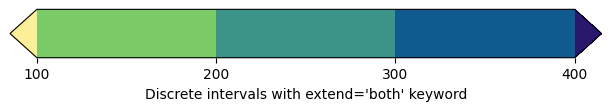

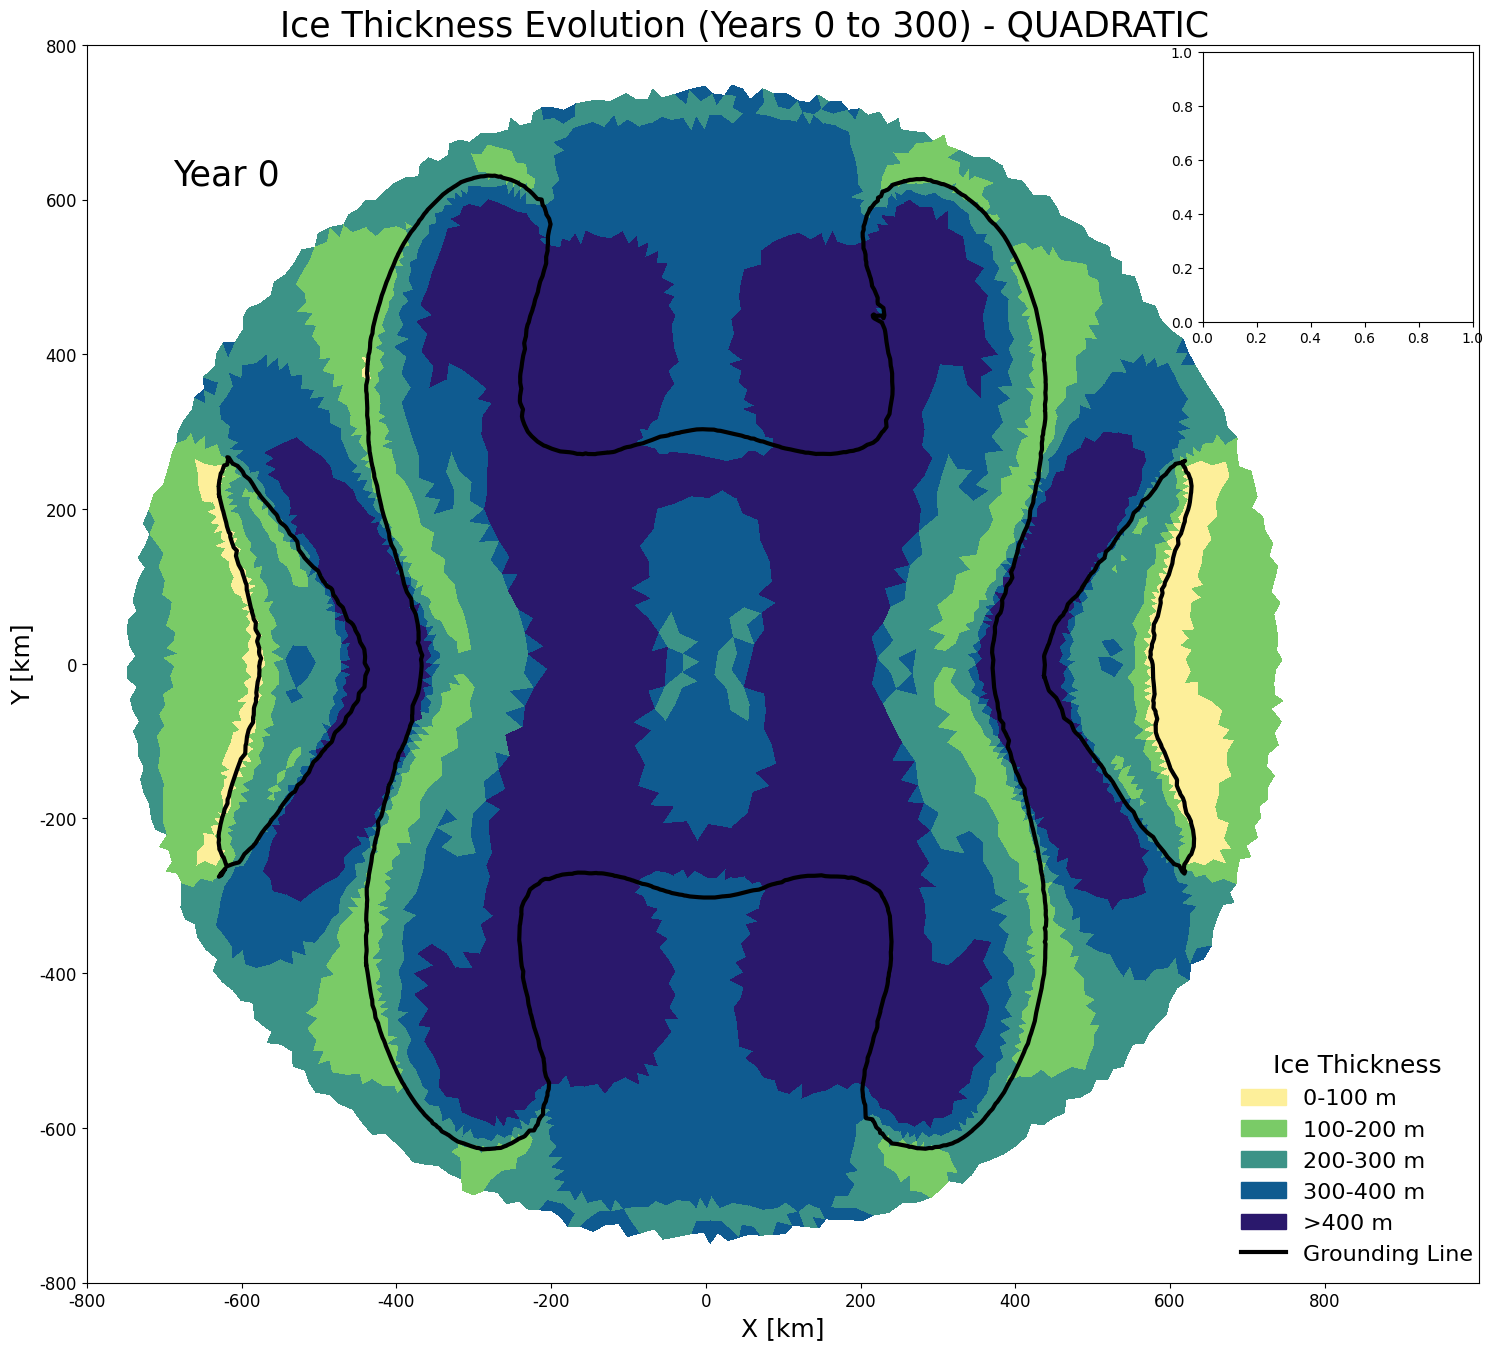

In [120]:
temp_files = []
images = []


cmap = cmo.haline_r
bounds = [ 100, 200, 300, 400]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N, extend='both')


# Get representative colors for each range
solid_colors = {
    '0-100': cmap(norm(50)),      # Midpoint of 0-100 range
    '100-200': cmap(norm(150)),   # Midpoint of 100-200 range
    '200-300': cmap(norm(250)),   # Midpoint of 200-300 range
    '300-400': cmap(norm(350)),   # Midpoint of 300-400 range
    '>400': cmap(norm(450))       # Slightly beyond max bound
}

# Convert to hex codes
hex_colors = {k: mpl.colors.to_hex(v) for k,v in solid_colors.items()}
print(hex_colors)

ranges = [
    (0, 100),
    (100, 200),
    (200, 300),
    (300, 400),
    (400, float('inf'))
]

# Create colormaps
cmap_red = ListedColormap([solid_colors['0-100']])
cmap_orange = ListedColormap([solid_colors['100-200']])
cmap_blue = ListedColormap([solid_colors['200-300']])
cmap_purple = ListedColormap([solid_colors['300-400']])
cmap_grey = ListedColormap([solid_colors['>400']])


legend_handles = [
    Patch(color=solid_colors['0-100'], label='0-100 m'),
    Patch(color=solid_colors['100-200'], label='100-200 m'),
    Patch(color=solid_colors['200-300'], label='200-300 m'),
    Patch(color=solid_colors['300-400'], label='300-400 m'),
    Patch(color=solid_colors['>400'], label='>400 m')
]

#################################################################################################################################

fig, ax = plt.subplots(figsize=(6, 1), layout='constrained')

fig.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             cax=ax, orientation='horizontal',
             label="Discrete intervals with extend='both' keyword")



for year in range(0,1, 1):
    Hi = Hi_l[year]
    p = 0.01
    #mask_rock = (Hs_l[year] - Hi_l[year] - Hb_l[year] > p)
    GL = Lad['grounding_line'][year]


    # Create figure with adjusted layout
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111)

    # Plot main data
    c0 = ax.tripcolor(triang, Hi_l[year].where(mask_ocean ),norm = norm, cmap=cmap)

    ax.plot(GL[0, :], GL[1, :], color='black', linewidth=3, label='Grounding Line')

   # ax.legend(loc ='right', bbox_to_anchor=(1.01, 0.5))

    Hs = Hs_l[year]
    Hb = Hb_l[year]
    #mask0 = mask_rock(Hs,Hi,Hb,year)

    # Calculate area-weighted percentages
    percentages = calculate_area_percentages(V, Hi_l[year].where(mask_ocean), ranges)
    
    # Prepare pie chart data
    sizes = percentages
    colors = list(solid_colors.values())
    
    # Add pie chart in bottom right
    pie_ax = inset_axes(ax, width=2.7, height=2.7, loc='upper right',
                       bbox_to_anchor=(1.,1.), bbox_transform=ax.transAxes)
    """
    if np.sum(sizes) > 0:
        wedges, texts = pie_ax.pie(sizes, colors=colors, startangle=90,
                                 wedgeprops=dict(width=0.5, edgecolor='w'))
        
        # Add percentage labels
        for j, wedge in enumerate(wedges):
            if sizes[j] > 5:  # Only show label if percentage > 5%
                angle = (wedge.theta2 - wedge.theta1)/2 + wedge.theta1
                x = 1.3* np.cos(np.deg2rad(angle))
                y = 1.2 * np.sin(np.deg2rad(angle))
                pie_ax.text(x, y, f'{sizes[j]:.1f}%', ha='center', va='center', fontsize=10)
    else:
        pie_ax.text(0.5, 0.5, 'No Data', ha='center', va='center')
        pie_ax.set_xticks([])
        pie_ax.set_yticks([])
    """


    # Set main plot properties
    ax.set_title(f'Year {year}', fontsize=tfs+5, x = 0.1, y = 0.88)
    ax.set_xlabel('X [km]', fontsize=afs)
    ax.set_ylabel('Y [km]', fontsize=afs)
    ax.set_xticks(np.arange(-n, n + 1, 200000))
    ax.set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200),fontsize = 12)
    ax.set_yticks(np.arange(-n, n + 1, 200000))
    ax.set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200),fontsize = 12)
    ax.set_xlim(-n, n+200000)
    ax.set_ylim(-n, n)
    ax.set_aspect('equal')

    #ax.legend(loc='upper left', bbox_to_anchor=(1, 1), edgecolor='white', fontsize=16, frameon=False)

    # Add legend in the middle row
    # Create combined legend handles
    all_handles = [
    *legend_handles,  # Your colorbar patches
    Line2D([0], [0], color='black', lw=3, label='Grounding Line')  # Add GL handle
    ]

    # Create single legend
    legend = ax.legend(handles=all_handles, 
                   title='Ice Thickness', 
                   loc='right', 
                   ncol=1,
                   fontsize=16,
                   frameon=False,
                   bbox_to_anchor=(1.01, 0.1),
                   title_fontsize=18)


    plt.suptitle('Ice Thickness Evolution (Years 0 to 300) - QUADRATIC', fontsize=tfs+5,x = 0.5, y=0.92)  

    plt.tight_layout()

    filename = f'TEMP{year}.png'
    plt.savefig(filename, bbox_inches='tight', dpi=300) 
    temp_files.append(filename) 
    plt.close
    images.append(imageio.imread(filename))


In [128]:
percentages = calculate_area_percentages(V, Hi_l[year].where(mask_ocean), ranges)
percentages

[0.0, 0.0, 0.0, 0.0, 0.0]

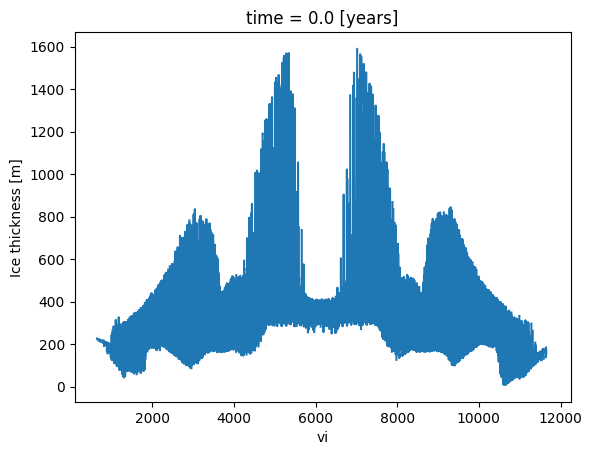

In [126]:
Hi_l[year].where(mask_ocean).plot()

In [11]:
imageio.mimsave('Thickness_Quad_GL.gif', images, fps = 3)

# Clean up temporary files
for filename in temp_files:
    try:
        os.remove(filename)
        print(f"Deleted temporary file: {filename}")
    except OSError as e:
        print(f"Error deleting {filename}: {e}")

print("GIF created and temporary files cleaned up")

Deleted temporary file: TEMP0.png
Deleted temporary file: TEMP1.png
Deleted temporary file: TEMP2.png
Deleted temporary file: TEMP3.png
Deleted temporary file: TEMP4.png
Deleted temporary file: TEMP5.png
Deleted temporary file: TEMP6.png
Deleted temporary file: TEMP7.png
Deleted temporary file: TEMP8.png
Deleted temporary file: TEMP9.png
Deleted temporary file: TEMP10.png
Deleted temporary file: TEMP11.png
Deleted temporary file: TEMP12.png
Deleted temporary file: TEMP13.png
Deleted temporary file: TEMP14.png
Deleted temporary file: TEMP15.png
Deleted temporary file: TEMP16.png
Deleted temporary file: TEMP17.png
Deleted temporary file: TEMP18.png
Deleted temporary file: TEMP19.png
Deleted temporary file: TEMP20.png
Deleted temporary file: TEMP21.png
Deleted temporary file: TEMP22.png
Deleted temporary file: TEMP23.png
Deleted temporary file: TEMP24.png
Deleted temporary file: TEMP25.png
Deleted temporary file: TEMP26.png
Deleted temporary file: TEMP27.png
Deleted temporary file: TEMP28

/var/folders/bv/2cj65x2j5v94fp020tpswb0w0000gn/T/ipykernel_9604/2574893056.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/bv/2cj65x2j5v94fp020tpswb0w0000gn/T/ipykernel_9604/2574893056.py:81: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
/var/folders/bv/2cj65x2j5v94fp020tpswb0w0000gn/T/ipykernel_9604/2574893056.py:75: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


KeyboardInterrupt: 

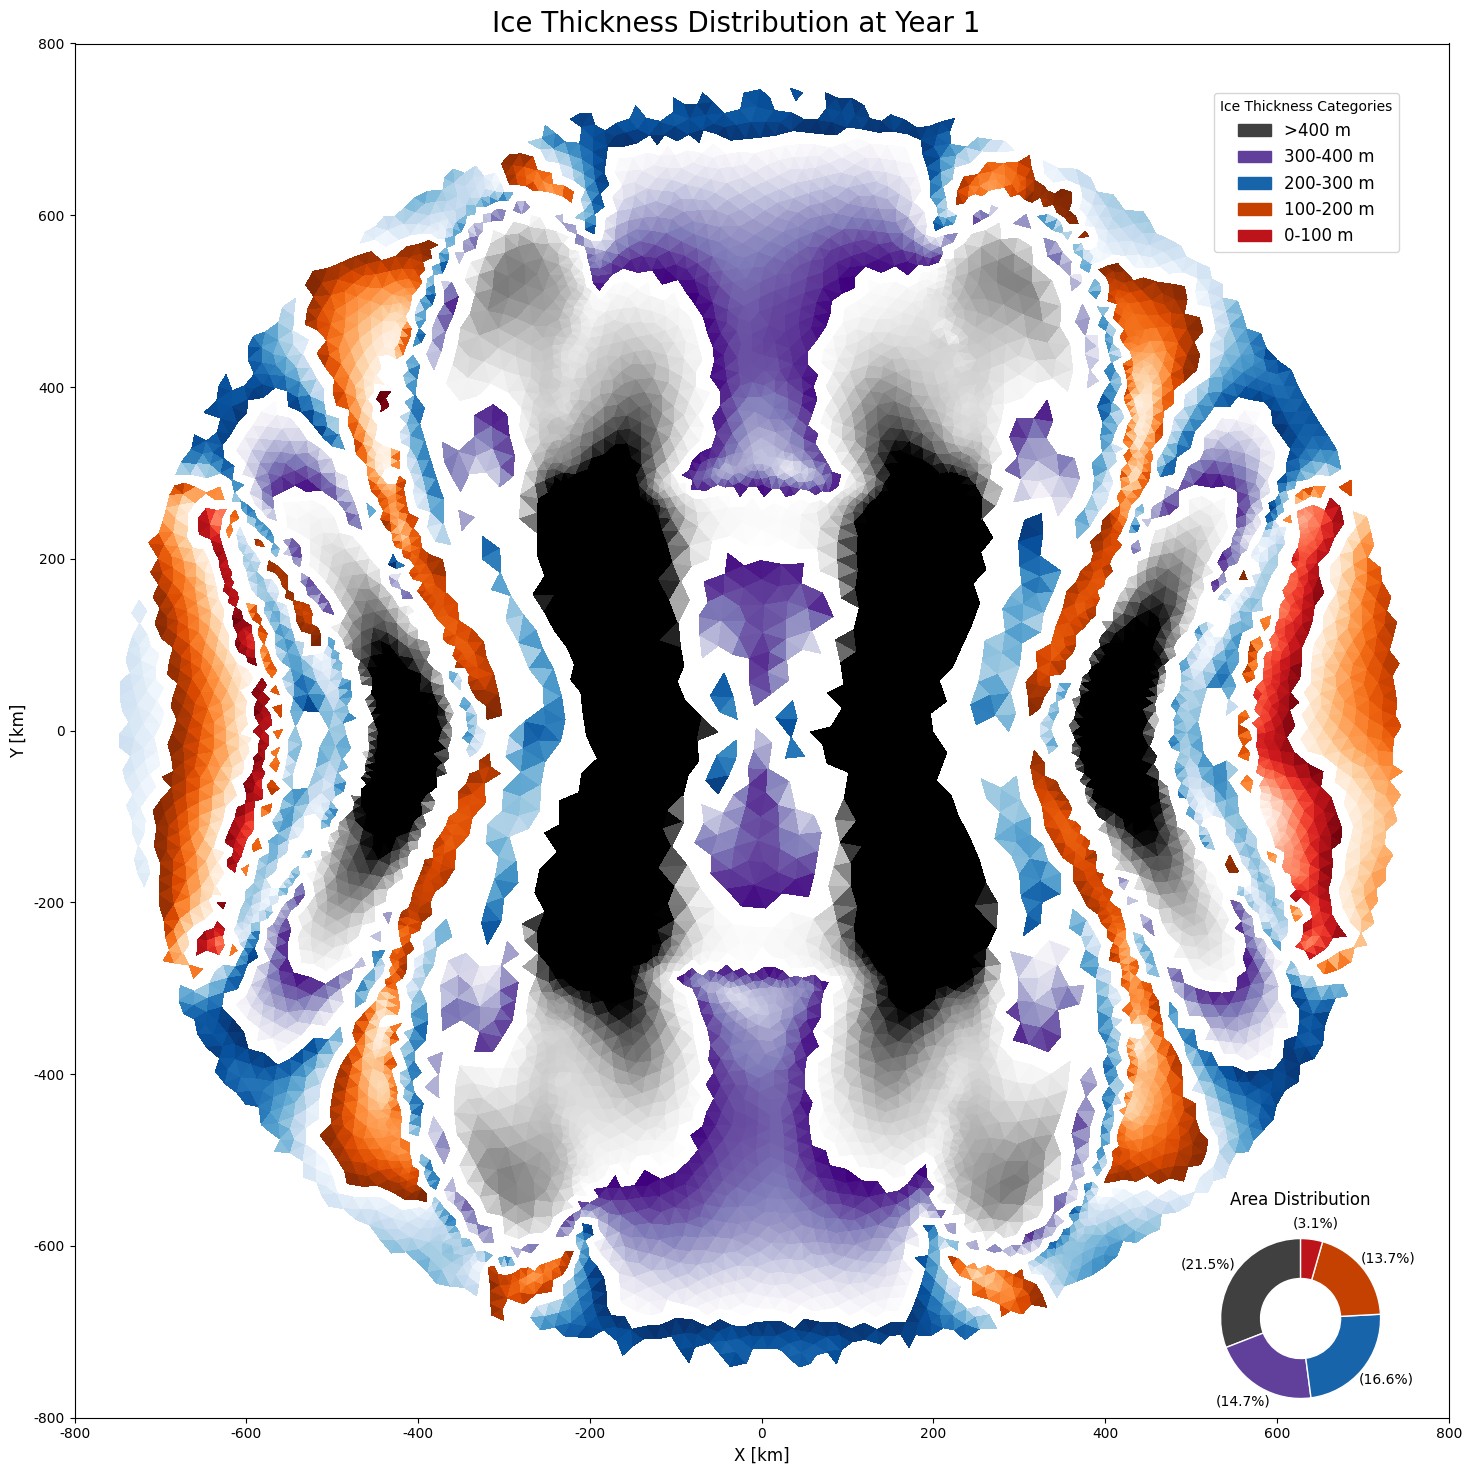

In [11]:
# Create colormaps using gradients
cmap_grey = plt.get_cmap('Greys')
cmap_purple = plt.get_cmap('Purples')
cmap_blue = plt.get_cmap('Blues')
cmap_orange = plt.get_cmap('Oranges')
cmap_red = plt.get_cmap('Reds')

temp_files = []
images = []
for year in range(0, 51, 1):
    # Create figure with adjusted layout
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111)
    mask_rock = (Hs_l[year] - Hi_l[year] - Hb_l[year] > p)
    Hi = Hi_l[year]
    
    # Plot main data using gradient colormaps
    c0 = ax.tripcolor(triang, Hi.where(Hi > 400), cmap=cmap_grey, vmin = 400, vmax = 600)
    c1 = ax.tripcolor(triang, Hi.where((Hi > 300) & (Hi <= 400)), cmap=cmap_purple)
    c2 = ax.tripcolor(triang, Hi.where((Hi > 200) & (Hi <= 300)), cmap=cmap_blue)
    c3 = ax.tripcolor(triang, Hi.where((Hi > 100) & (Hi <= 200)), cmap=cmap_orange)
    c4 = ax.tripcolor(triang, Hi.where((Hi > 0) & (Hi <= 100)), cmap=cmap_red)

    # Rest of the code remains unchanged
    ax.set_xlabel('X [km]', fontsize=12)
    ax.set_ylabel('Y [km]', fontsize=12)
    ax.set_xticks(np.arange(-n, n + 1, 200000))
    ax.set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax.set_yticks(np.arange(-n, n + 1, 200000))
    ax.set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax.set_xlim(-n, n)
    ax.set_ylim(-n, n)
    ax.set_aspect('equal')

    hi_data = Hi.values.flatten()
    hi_data = hi_data[~np.isnan(hi_data)]
    total_area = len(hi_data)

    categories = {
        '>400': np.sum(hi_data > 400),
        '300-400': np.sum((hi_data > 300) & (hi_data <= 400)),
        '200-300': np.sum((hi_data > 200) & (hi_data <= 300)),
        '100-200': np.sum((hi_data > 100) & (hi_data <= 200)),
        '0-100': np.sum((hi_data > 0) & (hi_data <= 100))
    }

    sizes = [categories[key] for key in categories.keys()]
    colors = [cmap_grey(0.8), cmap_purple(0.8), cmap_blue(0.8), cmap_orange(0.8), cmap_red(0.8)]
    labels = [f'{key} m' for key in categories.keys()]
    percentages = [f'({size/total_area:.1%})' for size in sizes]

    # Create legend
    legend_handles = [mpatches.Patch(color=color, label=f'{label}') for color, label in zip(colors, labels)]
    legend = ax.legend(handles=legend_handles, title='Ice Thickness Categories',
                        loc='upper right', bbox_to_anchor=(0.97, 0.97), fontsize=12)

    # Create smaller pie chart
    pie_ax = inset_axes(ax, width=2, height=2, loc='upper right',
                        bbox_to_anchor=(0.97, 0.15), bbox_transform=ax.transAxes)

    wedges, texts = pie_ax.pie(sizes, colors=colors, startangle=90,
                               wedgeprops=dict(width=0.5, edgecolor='w'))

    # Add percentage labels outside wedges
    for i, wedge in enumerate(wedges):
        angle = (wedge.theta2 - wedge.theta1) / 2 + wedge.theta1
        x = 1.4 * np.cos(np.deg2rad(angle))
        y = 1.2 * np.sin(np.deg2rad(angle))
        pie_ax.text(x, y, percentages[i], ha='center', va='center',
                    fontsize=10, color='black')

    pie_ax.set_title('Area Distribution', fontsize=12, pad=10)

    plt.suptitle(f'Ice Thickness Distribution at Year {year}', fontsize=20, y=0.98)
    plt.tight_layout()

    filename = f'TEMP{year}.png'
    plt.savefig(filename, bbox_inches='tight', dpi=300) 
    temp_files.append(filename) 
    plt.close()
    images.append(imageio.imread(filename))


In [15]:
imageio.mimsave('Thickness_grad_rock.gif', images, fps = 3)

# Clean up temporary files
for filename in temp_files:
    try:
        os.remove(filename)
        print(f"Deleted temporary file: {filename}")
    except OSError as e:
        print(f"Error deleting {filename}: {e}")

print("GIF created and temporary files cleaned up")

Deleted temporary file: TEMP0.png
Deleted temporary file: TEMP1.png
Deleted temporary file: TEMP2.png
Deleted temporary file: TEMP3.png
Deleted temporary file: TEMP4.png
Deleted temporary file: TEMP5.png
Deleted temporary file: TEMP6.png
Deleted temporary file: TEMP7.png
Deleted temporary file: TEMP8.png
Deleted temporary file: TEMP9.png
Deleted temporary file: TEMP10.png
Deleted temporary file: TEMP11.png
Deleted temporary file: TEMP12.png
Deleted temporary file: TEMP13.png
Deleted temporary file: TEMP14.png
Deleted temporary file: TEMP15.png
Deleted temporary file: TEMP16.png
Deleted temporary file: TEMP17.png
Deleted temporary file: TEMP18.png
Deleted temporary file: TEMP19.png
Deleted temporary file: TEMP20.png
Deleted temporary file: TEMP21.png
Deleted temporary file: TEMP22.png
Deleted temporary file: TEMP23.png
Deleted temporary file: TEMP24.png
Deleted temporary file: TEMP25.png
Deleted temporary file: TEMP26.png
Deleted temporary file: TEMP27.png
Deleted temporary file: TEMP28

/opt/miniconda3/envs/myenv/lib/python3.10/site-packages/xarray/core/common.py:180: RuntimeWarning: invalid value encountered in cast
  return np.array(self.values, dtype=dtype, copy=copy)
/var/folders/bv/2cj65x2j5v94fp020tpswb0w0000gn/T/ipykernel_6257/3731221579.py:68: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(filename))
/opt/miniconda3/envs/myenv/lib/python3.10/site-packages/xarray/core/common.py:180: RuntimeWarning: invalid value encountered in cast
  return np.array(self.values, dtype=dtype, copy=copy)
/var/folders/bv/2cj65x2j5v94fp020tpswb0w0000gn/T/ipykernel_6257/3731221579.py:68: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disa

KeyboardInterrupt: 

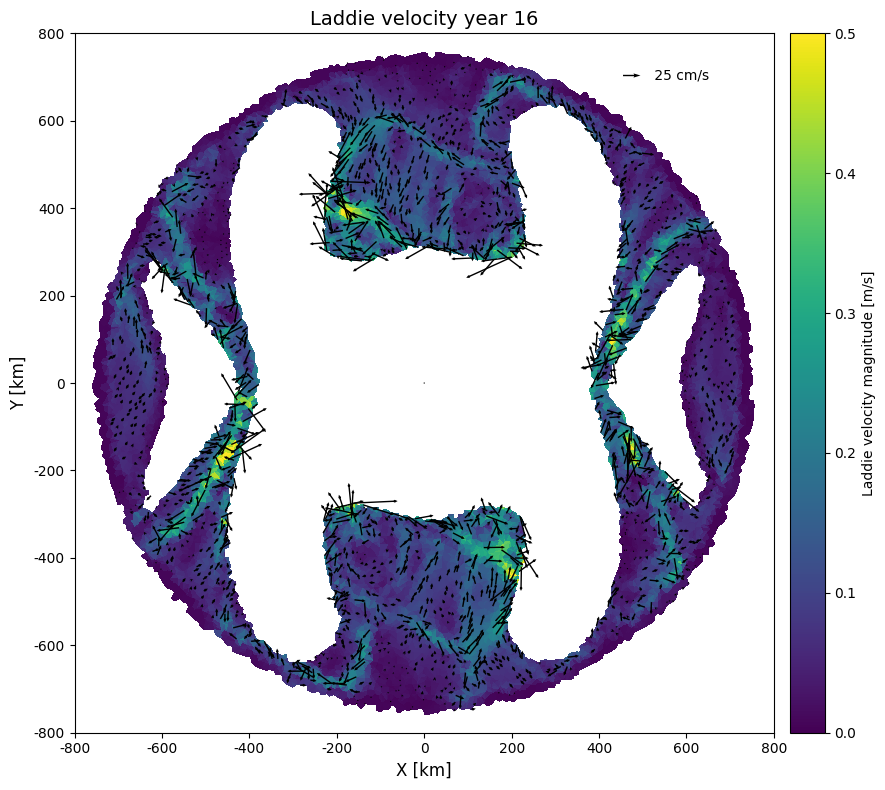

In [16]:
colorbar_kwargs = {
    'aspect': 20,
    'pad': 0.01,
    'shrink': 1, 
}

m = 4
subsampled_mask = (Mag[u][::m] >= 0.01) 

temp_files = []
images = []

for u in range(0, 51, 1):
##############################################################################################################################
    fig, ax = plt.subplots(1, 1, figsize=(16, 8)) 

    c0 = ax.tripcolor(
        Tricc[0, :], 
        Tricc[1, :], 
        Mag[u].where(Mag[0] != 0), 
        cmap='viridis', 
        vmin=0, 
        vmax=0.5
    )

    fig.colorbar(c0, ax=ax, label="Laddie velocity magnitude [m/s]", **colorbar_kwargs)
    ax.set_title(f'Laddie velocity year {u}', fontsize=14)

    plt.quiver(Tricc[0, :][::m][subsampled_mask],
        Tricc[1, :][::m][subsampled_mask],
        U_lad[u][::m][subsampled_mask],
        V_lad[u][::m][subsampled_mask],
        scale=10,
        width=0.002,
        headwidth=2,
        headlength=2,
        headaxislength=3,
        color = 'k'
    )
    plt.quiverkey(
        plt.quiver(0, 0, 0, 0, scale=10, width=0.002),
        X=0.75,
        Y=0.9,
        U=0.25,
        label=' 25 cm/s',
        labelpos='E',
        coordinates='figure',
        color='k'
    )


    ax.set_aspect('equal')
    ax.set_xlabel('X [km]', fontsize=12)
    ax.set_ylabel('Y [km]', fontsize=12)
    ax.set_xticks(np.arange(-n, n + 1, 200000))
    ax.set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax.set_yticks(np.arange(-n, n + 1, 200000))
    ax.set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax.set_xlim(-n, n)
    ax.set_ylim(-n, n)

    plt.tight_layout()
    
    filename = f'TEMP{year}.png'
    plt.savefig(filename, bbox_inches='tight', dpi=300) 
    temp_files.append(filename) 
    plt.close()
    images.append(imageio.imread(filename))


In [ ]:
imageio.mimsave('LaddieSpeed.gif', images, fps = 3)

# Clean up temporary files
for filename in temp_files:
    try:
        os.remove(filename)
        print(f"Deleted temporary file: {filename}")
    except OSError as e:
        print(f"Error deleting {filename}: {e}")

print("GIF created and temporary files cleaned up")

ValueError: all input arrays must have the same shape

In [ ]:
u_s = Lad['u_surf']
v_s = Lad['v_surf']
          
magice = np.sqrt(u_s**2 +v_s**2)
colorbar_kwargs = {
    'aspect': 20,
    'pad': 0.01,
    'shrink': 1, 
}

m = 10
temp_files = []
images = []

for u in range(0, 51, 1):

##############################################################################################################################
    fig, ax = plt.subplots(1, 1, figsize=(16, 8)) 

    c0 = ax.tripcolor(
        Tricc[0, :], 
        Tricc[1, :], 
        magice[u], 
        cmap='viridis', 
        vmin=0, 
        vmax=400

    )

    fig.colorbar(c0, ax=ax, label="Velocity magnitude [m/y]", **colorbar_kwargs)
    ax.set_title(f'Ice velocity year {u}', fontsize=14)


    u_s_norm = u_s[u][::m] / np.sqrt(u_s[u][::m]**2 + v_s[u][::m]**2)
    v_s_norm = v_s[u][::m] / np.sqrt(u_s[u][::m]**2 + v_s[u][::m]**2)


    plt.quiver(Tricc[0, :][::m],
        Tricc[1, :][::m],
        u_s_norm,
        v_s_norm,
        scale=50,
        width=0.002,
        headwidth=3,
        headlength=4,
        headaxislength=3
    )

    plt.quiverkey(
        plt.quiver(0, 0, 0, 0, scale=10000, width=0.002),
        X=0.75,
        Y=0.97,
        U= 200,
        label=' Normalized quivers',
        labelpos='E',
        coordinates='figure',
        color='k'
    )

    ax.set_aspect('equal')
    ax.set_xlabel('X [km]', fontsize=12)
    ax.set_ylabel('Y [km]', fontsize=12)
    ax.set_xticks(np.arange(-n, n + 1, 200000))
    ax.set_xticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax.set_yticks(np.arange(-n, n + 1, 200000))
    ax.set_yticklabels(np.arange(-n // 1000, n // 1000 + 1, 200))
    ax.set_xlim(-n, n)
    ax.set_ylim(-n, n)

    plt.tight_layout()
    
    filename = f'TEMP{year}.png'
    plt.savefig(filename, bbox_inches='tight', dpi=300) 
    temp_files.append(filename) 
    plt.close()
    images.append(imageio.imread(filename))

In [ ]:
imageio.mimsave('IceSpeed.gif', images, fps = 3)

# Clean up temporary files
for filename in temp_files:
    try:
        os.remove(filename)
        print(f"Deleted temporary file: {filename}")
    except OSError as e:
        print(f"Error deleting {filename}: {e}")

print("GIF created and temporary files cleaned up")